In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
print(np.max(x_train), np.min(x_train))

255 0


In [3]:
55000*28*28

43120000

In [3]:
x_train.reshape(-1, 1).shape

(43120000, 1)

In [4]:
a=np.arange(0,12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
b=a.reshape(-1, 1)
b

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [6]:
b.reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
# x = (x - u) / std
#通过原有sk的标准化进行处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
#先reshape变为二维（相当于1列）的目的是对每一个像素点进行标准化（让其等价）
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
#这个是验证集，验证集用的也是训练集的均值和方差
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
#这个是测试集
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [5]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [8]:
# tf.keras.models.Sequential()

"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [9]:
#如果再次直接fit是接着之前的进行训练的，如果要从头训练，要重新执行上面代码
history = model.fit(x_train_scaled, y_train, epochs=20,
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8746 - accuracy: 0.7107 - val_loss: 0.6055 - val_accuracy: 0.7932
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5709 - accuracy: 0.8010 - val_loss: 0.5172 - val_accuracy: 0.8190
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5080 - accuracy: 0.8199 - val_loss: 0.4759 - val_accuracy: 0.8366
Epoch 4/20
1719/1719 [==============================] - 9s 6ms/step - loss: 0.4726 - accuracy: 0.8321 - val_loss: 0.4504 - val_accuracy: 0.8464
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4490 - accuracy: 0.8406 - val_loss: 0.4336 - val_accuracy: 0.8482
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4313 - accuracy: 0.8476 - val_loss: 0.4219 - val_accuracy: 0.8572
Epoch 7/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4176 - accuracy: 0.8515 - val_loss: 0.4075 - val_accuracy:

In [10]:
print(type(history.history))
# print(history.history)

<class 'dict'>


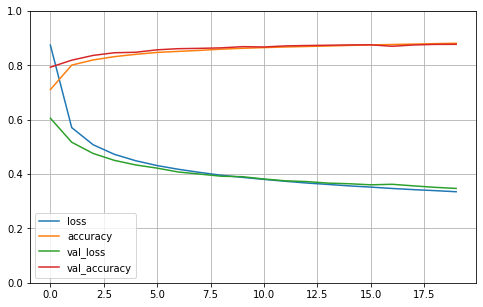

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [12]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.3888123035430908, 0.8621000051498413]